# Assignment 4

_EE2703: Applied Programming_

*Author: Varun Sundar, EE16B068*

#### Conventions

1. We are using Python 3, GCC for C 
2. Underscore naming vs Camel Case
3. PEP 25 convention style.

# Abstract

This weeks assignment concerns with the prinicples of least squares ($L_2$ norm) fitting and an examination of its dependence on factors including number of points fit (size of dataset), noise of IID (independent and identically distributed) measurements, as well as model chosen to regress upon. We conduct appropriate observations for the case of estimating linear models for the first Bessel function, $J_1$.

# Introduction

Linear regression (least squares fitting) comprises of:

$$ Ax=y$$

where,
x is a vector of the model's linear decomposition;

or 

$$\vec{x}=\sum_{i=1}^{m}{x_i} ,$$ with $x_i$ being the linear decompositions.

$A_{{m}{n}}$ is a matrix comprisisng of the linear coeffecients of a $x_i$.

and, $y$ comprises the values measured.

To fit the model, we require that $A$ is full column rank, and that the number of rows of A must be equal or greater than the number of columns. 

In reality, $y$ rarely corresponds to the exact ground truth, rather it has a pertubation of noise,ie...

$$ y^{measured}=y^{actual} + \epsilon $$

We shall notice that increasing the number of measurements can help improve the accuracy of the model under the influence of noise.



# Assignment Questions

## Part a

We shall be fitting the first Bessel function with two linear models.

Note that, 

$$ J_{\nu}(x)≈ \sqrt{\frac{2}{\pi x}} cos (x− \nu \frac{\pi}{2} −\frac{\pi}{4}) $$

for large values of $x$.

Here, scipy's implementation of the Bessel function has been used for ground truth values. Our measurments are carried for values of x in $(0,20)$, linearly spaced for 41 values.

In [12]:
import numpy as np
import scipy.special
J_exact=scipy.special.j1

In [13]:
# Estimated Bessel function
def J(x,v=1):
    # Bessel function of order v
    # Default 1
    return np.sqrt(2/(np.pi*x))*np.cos(x-np.pi*(v*1/2+1/4))

In [14]:
# Generate a set of 41 values
# Modify this for more values
x=np.linspace(0,20,num=41)

Populating the interactive namespace from numpy and matplotlib


/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


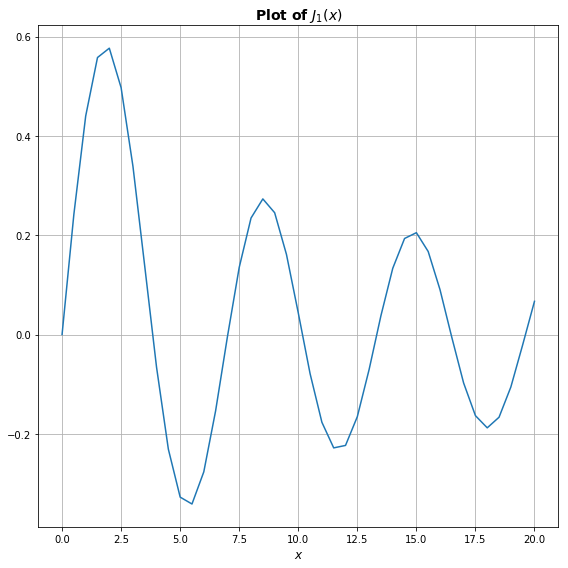

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  

%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)

figure, axarr = plt.subplots(1)
plt.grid(True)

axarr.grid(True)
axarr.set_title(r'Plot of $J_1(x)$', fontsize=14,fontweight="bold")

plt.xlabel('$x$',fontsize=12)

axarr.plot(x,J_exact(x))

# Neaten up plots
figure.tight_layout()
plt.show()

## Part b

We now generate a list of anchor points, $\vec{x_o}$,  wherein, for each $x_o$ we shall consider subvectors $x[x>x_o]$ for evaluating $J_1(x)$.

The first model we fit (hereafter refered to as "model b") shall be 

$$ A\cos(x_i)+B\sin(x_i) ≈ J_1(x_i)$$.

We also derive $\nu$ from the known values of $A$ and $B$, by comparing it to the form of the approximate model of $J_{\nu}(x)$ (accurate for large x).

In [16]:
# Generate a list of anchor points
x_o=np.linspace(0.5,18,num=17.5/0.5+1)

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [17]:
def extract_x_J(x,x_o):
    # Extract values of x> x_o and corresponding J values
    y=x[x>x_o]
    return (y,J_exact(y))

extract_x_J(x,0.6)

(array([  1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,
          5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,
         10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,
         14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,
         19. ,  19.5,  20. ]),
 array([ 0.44005059,  0.55793651,  0.57672481,  0.4970941 ,  0.33905896,
         0.13737753, -0.06604333, -0.23106043, -0.32757914, -0.34143822,
        -0.27668386, -0.1538413 , -0.00468282,  0.13524843,  0.23463635,
         0.27312196,  0.24531179,  0.16126443,  0.04347275, -0.07885001,
        -0.1767853 , -0.22837862, -0.2234471 , -0.1654838 , -0.07031805,
         0.03804929,  0.13337515,  0.19342946,  0.20510404,  0.16721318,
         0.09039718, -0.00576421, -0.09766849, -0.16341997, -0.18799489,
        -0.16663364, -0.10570143, -0.02087707,  0.06683312]))

In [18]:
def construct_matrix_model_b(x,x_o,eps=0):
    #F*A=C
    y,C=extract_x_J(x,x_o)
    F=np.zeros((len(y),2))
    F[:,0]=np.cos(y)
    F[:,1]=np.sin(y)
    C+=eps*np.random.randn(len(y))
    return (F,C)

construct_matrix_model_b(x,1)

(array([[ 0.0707372 ,  0.99749499],
        [-0.41614684,  0.90929743],
        [-0.80114362,  0.59847214],
        [-0.9899925 ,  0.14112001],
        [-0.93645669, -0.35078323],
        [-0.65364362, -0.7568025 ],
        [-0.2107958 , -0.97753012],
        [ 0.28366219, -0.95892427],
        [ 0.70866977, -0.70554033],
        [ 0.96017029, -0.2794155 ],
        [ 0.97658763,  0.21511999],
        [ 0.75390225,  0.6569866 ],
        [ 0.34663532,  0.93799998],
        [-0.14550003,  0.98935825],
        [-0.6020119 ,  0.79848711],
        [-0.91113026,  0.41211849],
        [-0.99717216, -0.07515112],
        [-0.83907153, -0.54402111],
        [-0.47553693, -0.87969576],
        [ 0.0044257 , -0.99999021],
        [ 0.48330476, -0.87545217],
        [ 0.84385396, -0.53657292],
        [ 0.99779828, -0.0663219 ],
        [ 0.90744678,  0.42016704],
        [ 0.59492066,  0.80378443],
        [ 0.13673722,  0.99060736],
        [-0.35492427,  0.93489506],
        [-0.75968791,  0.650

In [19]:
def extract_v_model_b(A,B):
    z=np.arccos(A/np.sqrt(A**2+B**2))
    v=(z-np.pi/4)/(np.pi/2)
    return v
    
def estimate_v_model_b(x,x_o,eps=0):
    F,C=construct_matrix_model_b(x,x_o,eps)
    A,B=np.linalg.lstsq(F,C)[0]
    v=extract_v_model_b(A,B)
    return (v,A,B)
    
[estimate_v_model_b(x,x_o_i)[0] for x_o_i in x_o]

[0.90636384701026018,
 0.94080483749318089,
 0.96949237195089255,
 0.98258390624400815,
 0.97820571805830425,
 0.96589586094660196,
 0.95944024519860316,
 0.9644614779073134,
 0.9760154922785651,
 0.98502943007168864,
 0.98535445347942874,
 0.97835729313337694,
 0.97172192911963784,
 0.97188287681869723,
 0.97842278658463155,
 0.98572496050555181,
 0.98807266595980492,
 0.98417802792910802,
 0.97836542755530298,
 0.97639332928035005,
 0.97993735886277644,
 0.98579713694136917,
 0.98918236227013667,
 0.98758198803549924,
 0.98295392391028491,
 0.97995991841793018,
 0.98130983232747471,
 0.9856377497500376,
 0.98937617164854941,
 0.98966426479022673,
 0.98660434459997304,
 0.98341310442973018,
 0.98307698820044565,
 0.98543378814994287,
 0.98840871547189124,
 0.9902678757579414]

## Part c

We now repeat the preceeding section with the a new model:


$$ A\frac{\cos(x_i)}{\sqrt{x}}+B\frac{\sin(x_i)}{\sqrt{x}} ≈ J_1(x_i)$$.

Model definition for part c, hereafter refered to as "model c".

We also compare the fits of the to models. (with respect to ground truth values).

In [20]:
def construct_matrix_model_c(x,x_o,eps=0):
    #F*A=C
    y,C=extract_x_J(x,x_o)
    F=np.zeros((len(y),2))
    F[:,0]=np.cos(y)/np.sqrt(y)
    F[:,1]=np.sin(y)/np.sqrt(y)
    C+=eps*np.random.randn(len(y))
    return (F,C)

def extract_v_model_c(A,B):
    z=np.arccos(A/np.sqrt(A**2+B**2))
    v=(z-np.pi/4)/(np.pi/2)
    return v
    
def estimate_v_model_c(x,x_o,eps=0):
    F,C=construct_matrix_model_c(x,x_o,eps)
    A,B=np.linalg.lstsq(F,C)[0]
    v=extract_v_model_c(A,B)
    return (v,A,B)
    

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


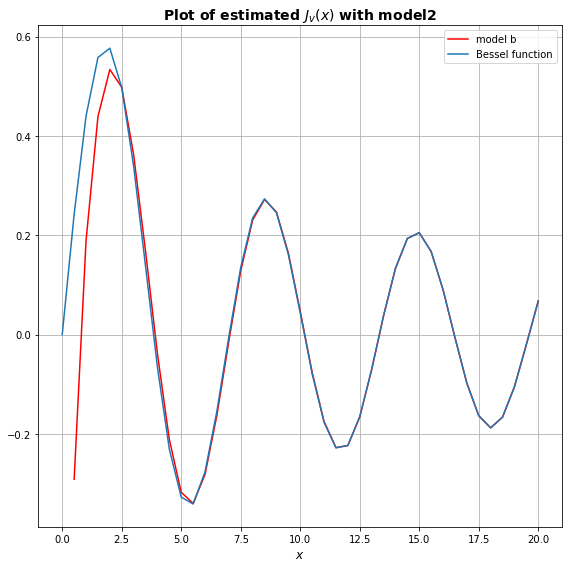

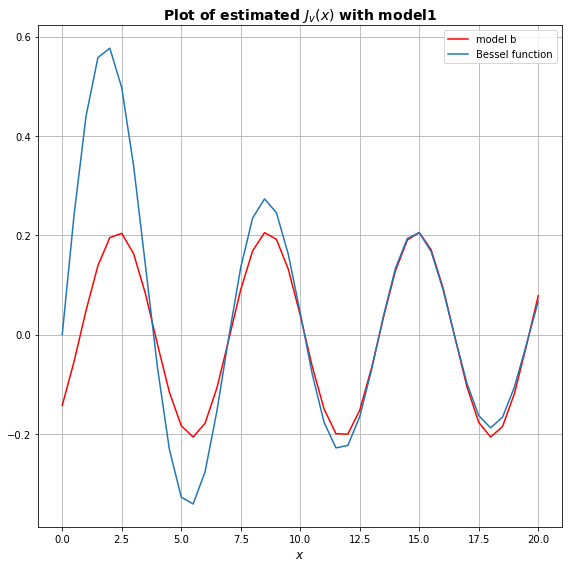

In [21]:
def model_b(x,A,B):
    return A*np.cos(x)+B*np.sin(x)
    
def model_c(x,A,B):
    return A*np.cos(x)/np.sqrt(x)+B*np.sin(x)/np.sqrt(x)
    
def plot_model(x,x_o=3,model_no=1):
    figure, axarr = plt.subplots(1)
    plt.grid(True)
    axarr.grid(True)
    axarr.set_title('Plot of estimated $J_v(x)$ with model' + str(model_no), fontsize=14,fontweight="bold")
    plt.xlabel('$x$',fontsize=12)
    # Neaten up plots
    figure.tight_layout()
    
    if model_no==1:
        A,B=estimate_v_model_b(x,x_o)[1:]
        axarr.plot(x,model_b(x,A,B),'r')
        axarr.plot(x,J_exact(x))
        plt.legend(("model b","Bessel function"))
        plt.show()
    else:
        A,B=estimate_v_model_c(x,x_o)[1:]
        axarr.plot(x,model_c(x,A,B),'r')
        axarr.plot(x,J_exact(x))
        plt.legend(("model b","Bessel function"))
        plt.show()
        
plot_model(x,11,2)
plot_model(x,11,1)

We notice that among the two models, model "c" does a compartitively better job of fitting $J_1(x)$. This can be attributed to the fact that the second model more accurately captures the linear coeffecients of the approximate Bessel model.

Also note that both models donot fit the curve well for small x, where the approximate Bessel model is not valid.

## Part d,e

We now write a wrapper function _calcnu_ which can call either model ("b" or "c"), and return the value of $\nu$ (order of the Bessel function) as predicted by each model. In addition to this, the amount of random IID noise to be added to the ground truth measurements (values of $J_1(x)$) may also be specified.

This is carried out for three cases- model  b, model c, and model c with 0.01 random normalised noise. Their respecitve predicted $\nu$ values for each $x_o$ are returned and plotted.

In [22]:
def calcnu(x,x_o,eps=0,model=1):
    if model==1:
        return estimate_v_model_b(x,x_o,eps)[0]
    else:
        return estimate_v_model_c(x,x_o,eps)[0]

In [23]:
series1=[calcnu(x,x_o_i,eps=0,model=1) for x_o_i in x_o]
series2=[calcnu(x,x_o_i,eps=0,model=2) for x_o_i in x_o]
series3=[calcnu(x,x_o_i,eps=0.01,model=2) for x_o_i in x_o]

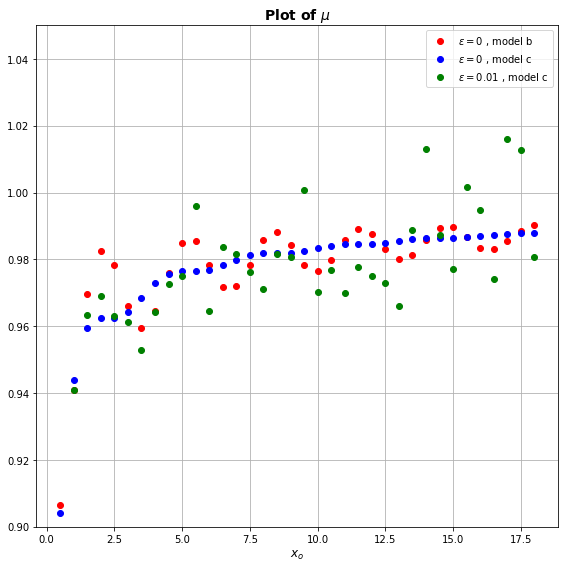

In [24]:
figure, axarr = plt.subplots(1)
plt.grid(True)

axarr.grid(True)
axarr.set_title(r'Plot of $\mu$', fontsize=14,fontweight="bold")

plt.xlabel('$x_o$',fontsize=12)
plt.ylim(0.9,1.05)

axarr.plot(x_o,series1,'ro',x_o,np.array(series2),'bo',x_o,np.array(series3),'go')
plt.legend(('$\epsilon =0$ , model b','$\epsilon =0$ , model c','$\epsilon =0.01$ , model c'))
# Neaten up plots
figure.tight_layout()
plt.show()

We observe that owing to the invalidity of the large $x$ approximation of $J_1(x)$, none of our models show the value of $\nu$ as 1 for small $x_o$. However, they converge for larger $x_o$. The effect of noise causes errors in the value of $\nu$ predicted. 

## Part f

Here,we vary the number of measurements taken. This is represented by our evenly spaced vector $\vec{x}$.

We notice that as the number of measurements increase, the effect of noise greatly diminishes. Ofcourse, our model(s) (in particular model c) fit well mainly for large x, where the approximation of 

$$ J_{\nu}(x)≈ \sqrt{\frac{2}{\pi x}} cos (x− \nu \frac{\pi}{2} −\frac{\pi}{4}) $$

is valid.

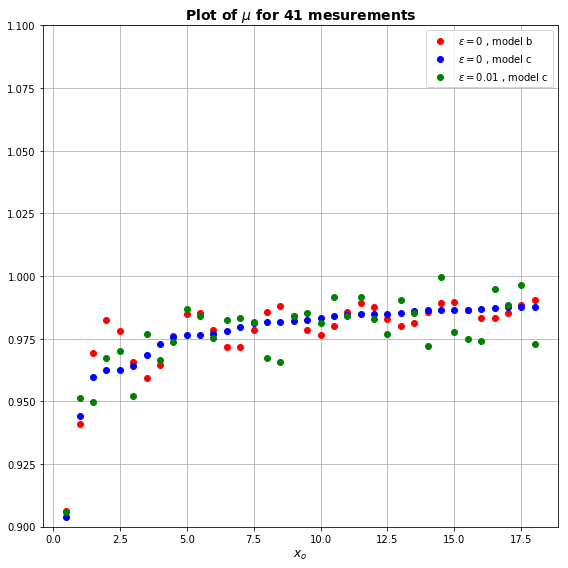

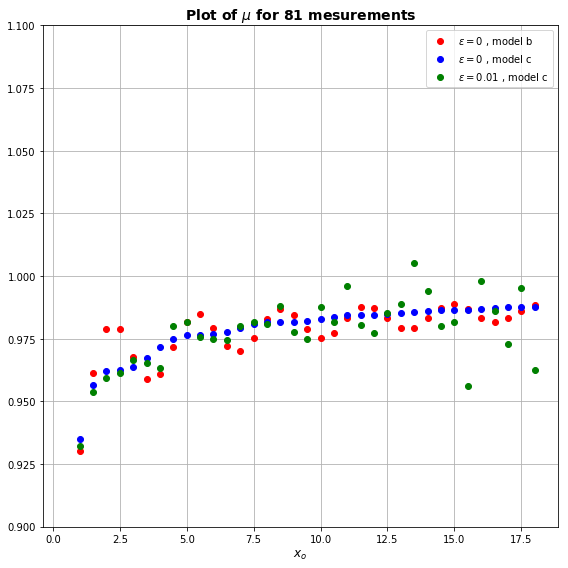

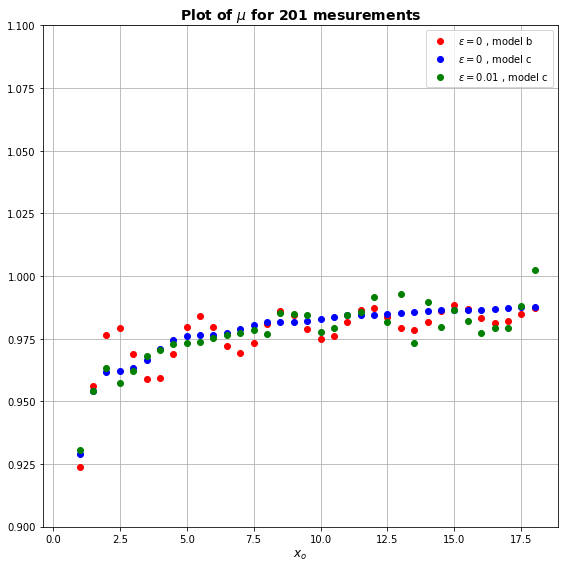

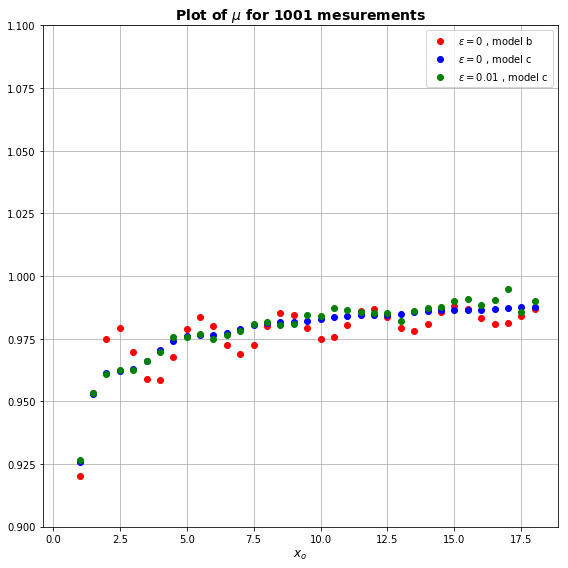

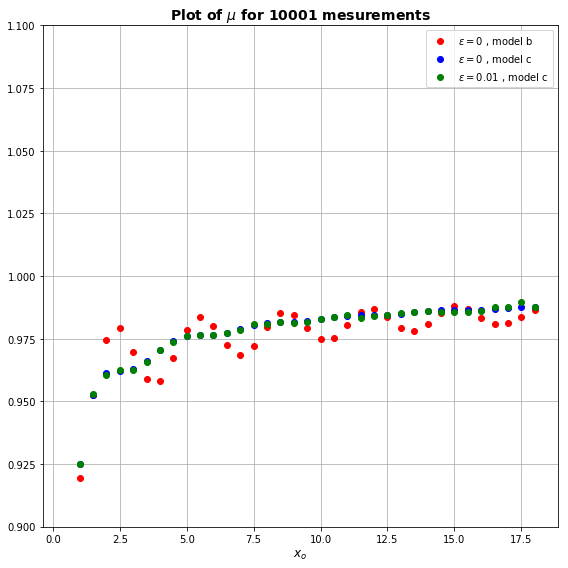

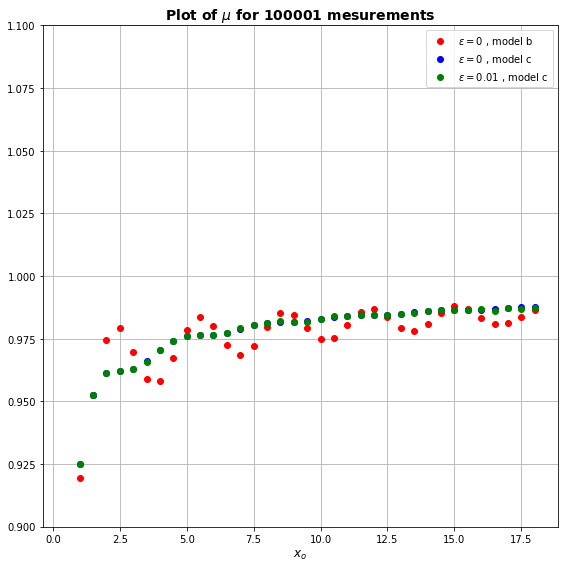

In [25]:
nums=[41,81,201,1001,10**4+1,10**5+1]

for num_index in range(len(nums)):
    figure, axarr = plt.subplots(1)
    figure.figsize=(6,6)
    plt.grid(True)
    x=np.linspace(0,20,num=nums[num_index])
    series1=[calcnu(x,x_o_i,eps=0,model=1) for x_o_i in x_o]
    series2=[calcnu(x,x_o_i,eps=0,model=2) for x_o_i in x_o]
    series3=[calcnu(x,x_o_i,eps=0.01,model=2) for x_o_i in x_o]
    
    plt.grid(True)
    axarr.set_title('Plot of $\mu$ for '+ str(nums[num_index]) +' mesurements', fontsize=14,fontweight="bold")

    axarr.plot(x_o,series1,'ro',x_o,np.array(series2),'bo',x_o,np.array(series3),'go')
    plt.legend(('$\epsilon =0$ , model b','$\epsilon =0$ , model c','$\epsilon =0.01$ , model c'))
    # Neaten up plots
    plt.xlabel('$x_o$',fontsize=12)
    plt.ylim(0.9,1.1)
    figure.tight_layout()
    plt.show()

# Part g

Here, we study the effect of the noise on the quality of fit (the effect of measurements has been done above). The metric for error is chosen to be the value of $\nu$ returned and its converegence for large $x_o$.

We notice that as the noise amplitude is increased, quality of fit decreases.

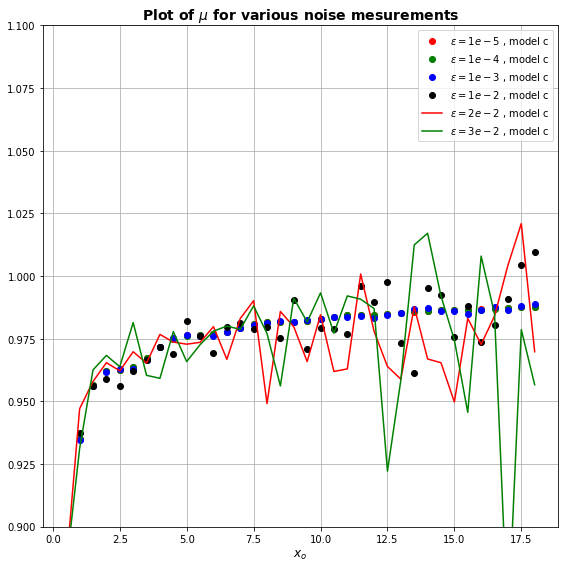

In [29]:
noise_list=[1e-5,1e-4,1e-3,1e-2,2e-2,3e-2]
figure, axarr = plt.subplots(1)
figure.figsize=(6,6)
colors=['ro','go','bo','ko','r-','g-']
for index in range(len(noise_list)):
    x=np.linspace(0,20,num=81)
    series1=[calcnu(x,x_o_i,eps=noise_list[index],model=2) for x_o_i in x_o]    
    axarr.plot(x_o,series1,colors[index])

axarr.set_title('Plot of $\mu$ for various noise mesurements', fontsize=14,fontweight="bold") 
plt.grid(True)
plt.legend(('$\epsilon =1e-5$ , model c','$\epsilon =1e-4$ , model c','$\epsilon =1e-3$ , model c','$\epsilon =1e-2$ , model c','$\epsilon =2e-2$ , model c','$\epsilon =3e-2$ , model c'))
# Neaten up plots
plt.xlabel('$x_o$',fontsize=12)
plt.ylim(0.9,1.1)
figure.tight_layout()
plt.show()

# Results and Discussion

We have examined the usefulness of least squares approximation of a function by various models, and noted its particular utility when the model closely matches and approximation of a function  upto linear terms. In addition to this, the effect of pertubation of ground truth measurements with the addition of noise has also been obsereved.

It has been noted that for the given approximation of 

$$ J_{\nu}(x)≈ \sqrt{\frac{2}{\pi x}} cos (x− \nu \frac{\pi}{2} −\frac{\pi}{4}) $$

the effect of noise is largely augmented for large cutoff $x_o$, owing to a smaller row dataset. Thus,it establishes a tradeoff between  the value of $\nu$ we wish to accurately predict as well as the noise distortion we are willing to tolerate. Ofcourse, increasing the net number of measurements does drastically help lower this tradeoff. To conclude, we also briefely examined the effect of noise amplitude on the quality of fit obtained. Here, an estimate of the quality was chosen as the consistency of the value of $\nu$ returned. We note that larger noise distorts the quality of fit. The same conclusion maybe reached by plotting each of these models, albeit without a systematic overlook.